# Visualization

In [163]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [164]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [165]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Training the Data

In [166]:
# ## diving the dataset into depending and independent features
X = df.iloc[:, :-1].values  
y =df.iloc[:, 1].values 

In [167]:
 from sklearn.model_selection import train_test_split
#split the data qet into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split (X.reshape(-1,1), y,test_size=0.2, random_state=0)

# Training the Model

In [168]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [169]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

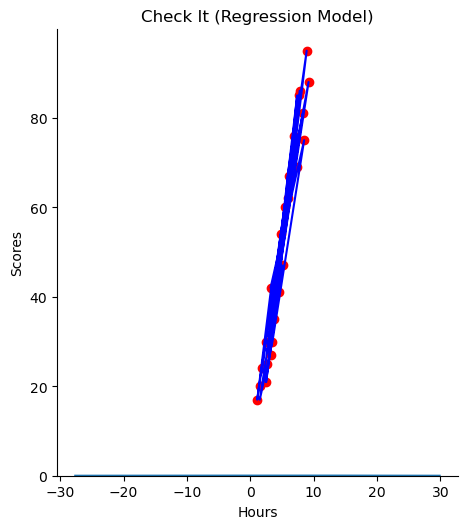

In [170]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

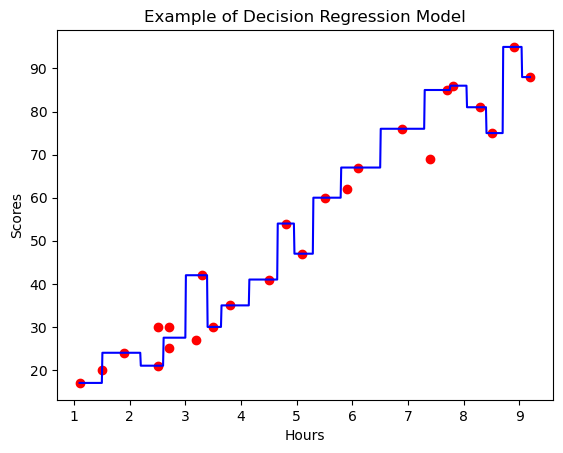

In [171]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Example of Decision Regression Model')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [172]:
y_pred=regressor.predict(X_test)

In [173]:
y_pred

array([17., 42., 85., 21., 67.])

In [174]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [175]:
score

0.8269052044609665

In [176]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [177]:
treemodel=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [178]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

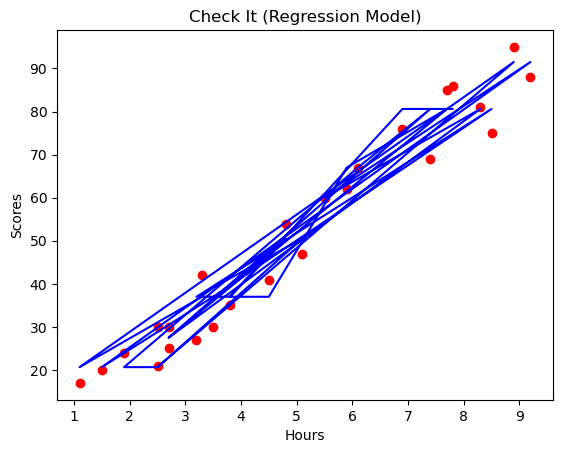

In [179]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressorcv.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

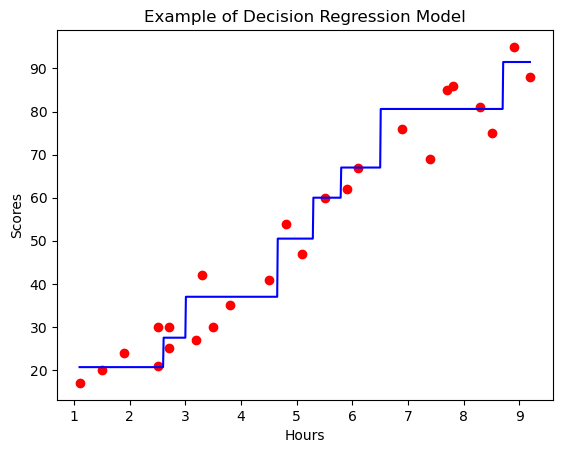

In [180]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressorcv.predict(X_grid), color = 'blue')
plt.title('Example of Decision Regression Model')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [181]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [182]:
parameter={
 'criterion':['squared_error'],
  'splitter':['best'],
  'max_depth':[3],
  'max_features':['auto']
    
}
regressor=DecisionTreeRegressor()

In [183]:
treemodel=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [184]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [3],
                         'max_features': ['auto'], 'splitter': ['best']},
             scoring='neg_mean_squared_error')

In [185]:
y_pred=regressorcv.predict(X_test)

In [186]:
y_pred

array([20.66666667, 37.        , 80.6       , 20.66666667, 67.        ])

In [187]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [188]:
score

0.8842719778184377

In [189]:
sns.displot(y_pred-y_test,kind="kde")

In [190]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,20.666667
1,27,37.000000
2,69,80.600000
3,30,20.666667
4,62,67.000000


# Result

In [199]:
 test_acc=np.array([[9.25]])

In [200]:
y_pred=regressorcv.predict(test_acc)

In [201]:
y_pred

array([91.5])

In [202]:
print("In 9.25 Hours student will score:",y_pred,"Marks")

In 9.25 Hours student will score: [91.5] Marks
